In [195]:
import numpy as np
import random
import matplotlib.pyplot as plt # makes plotting command available as plot.[name of command]
from ipywidgets import interactive
import scipy.stats
from itertools import chain, combinations

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

random.seed("Submission_group_8")

In [225]:
def evaluate_monomial(monomial, params):
    """
    monomial=list of bools, size 2*n
    params=list of bools, size n
    """
    res=True
    n=len(params)
    for i in range(0,n):
        if monomial[2*i]:
            res= res and params[i]
        if monomial[2*i+1]:
            res= res and not params[i]                 
    return res   
        
def generate_monomial(n):
    k= random.randint(0,n)
    res=[False for i in range(2*n)]
    for j in random.sample([i for i in range(n)],k):
        true_false=random.random()
        if(true_false < 0.5):
            res[2*j]=True
        else:
            res[2*j+1]=True
    return res
    
def generate_example(n,c):
    """
    input:
        n=size of example
        c=hidden monomial function
    """
    res=[]
    for i in range(n):
        true_false=random.random()
        if(true_false < 0.5):
            res.append(True)
        else:
            res.append(False)
    res.append(evaluate_monomial(c,res))
    return res    

def find_s_conjunctions(training_examples,n):
    #print(training_examples)
    h=[True for i in range(2*n)]
    element_to_del=[]
    for example in training_examples:
        #print(h)
        if(example[-1]!= evaluate_monomial(h,example[:-1])):
            for i in range(n):
                if(example[i]):
                    h[2*i+1] = False
                else:
                    h[2*i] = False
    return h

def excercise_b(n,l,p,q):
    """
    Runs the algorithm as specified in Task 4 ii)
    In the sections introducing noise/inconsistensies I flip resp. duplicate with percentage
    in the sense of expected Value. This is avoids the error of rounding the percentage but introduces variance.
    Both methods get better with an increasing number of examples(Expected Value via the Law of large numbers,
    rounding because the rounding error decreases)
    Input:
        n:size of examples/monomial
        p:prob of noise
        q:prob of inconsistency
        l:number of examples
    Output:
        fraction of instances that are correctly classified
    """
    c=generate_monomial(n)
    examples=[generate_example(n,c)for i in range(l)]
    #introduce noise and insistency
    to_add=[]
    for example in examples:
        if(random.random()<p):
            example[-1]=not example[-1]
        if(random.random()<q):
            to_add.append(example[:-1]+ [not example[-1]])
    examples+=to_add
    h=find_s_conjunctions(examples,n)
    counter =0
    power_set=list(powerset([i for i in range(n)]))
    for item_name in power_set:
        to_test=[False for i in range(n)]
        for i in list(item_name):
            to_test[i]=True
        #print(to_test)
        #sanity check: as h is the most specific hypothesis it mustn't be right if c is wrong
        assert not(not evaluate_monomial(c,to_test)and evaluate_monomial(h,to_test))
        if(evaluate_monomial(h,to_test)==evaluate_monomial(c,to_test)):
            counter+=1
    return counter/(2**n)
            
excercise_b(3,4,0,0)

[]
[0]
[1]
[2]
[0, 1]
[0, 2]
[1, 2]
[0, 1, 2]


1.0

In [226]:
def plot(k,n,l,p,q):
    """
    k=number of realizations
    n=length of monomial
    l=number of training examples
    p=prob of noise
    q=prob of inconsistency    
    """
    data=[excercise_b(n,l,p,q) for i in range(k)]
    abs_bars, bins = np.histogram(data,[i/2**n for i in range(2**n+2)])
    #print(bins[:-1])
    #print(abs_bars)
    plt.bar(bins[:-1], abs_bars,width=1/2**n)
    plt.axvline(np.array(data).mean(), color ='k', linestyle='dashed')
    plt.axvline(np.array(data).std(),color ='r', linestyle='dashed')
    plt.show
interactive(plot, k=(1,1000,1), n=(1,10,1),l=(1,20,1), p=(0,1,0.01),q=(0,1,0.01))

interactive(children=(IntSlider(value=500, description='k', max=1000, min=1), IntSlider(value=5, description='…

<function matplotlib.pyplot.show(*args, **kw)>

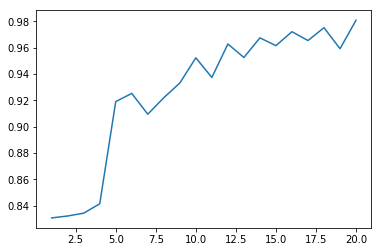

In [227]:
n=10
p=0
q=0
k=100
y_val=[]
for l in range(2*n):
    y_val.append(np.array([excercise_b(n,l+1,p,q) for i in range(k)]).mean())
plt.plot([i+1 for i in range(2*n)],y_val)
plt.xticks()
plt.show